In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import os

In [55]:
def generate_plots_fixed_size(csv_name1, csv_name2, csv_name3, dataset_folder = 'csv_results_scalability_THIN'):

    # Transalate a_b_c_mkl in a_b_c
    def remove_library_names(input_string):
        # Remove "mkl," "oblas," and "blis" (case-insensitive) from the input string
        modified_string = input_string.replace('.csv', '')

        return modified_string
    
    def remove_underscores(input_string):
        # Replace underscores with spaces
        modified_string = input_string.replace('_', ' ')

        return modified_string

    # Translate underscores to spaces in the CSV file name for plot titles
    plot_title = remove_underscores(remove_library_names(csv_name1))

    # Get the current directory
    current_dir = os.getcwd()

    # Define the path to the CSV file
    csv_file_path1 = os.path.join(current_dir, dataset_folder, csv_name1)
    csv_file_path2 = os.path.join(current_dir, dataset_folder, csv_name2)
    csv_file_path3 = os.path.join(current_dir, dataset_folder, csv_name3)

    # Check if the CSV file exists
    df = list()
    for csv_file_path in csv_file_path1, csv_file_path2,csv_file_path3:
        if not os.path.exists(csv_file_path):
            print(f"CSV file '{csv_file_path}' not found.")
        else:
            # Read data from the CSV file
            df.append(pd.read_csv(csv_file_path))

    # Compute the sample mean and standard deviation for time and GFLOPS
    time_mean = list()
    time_std = list()
    
    for dataframe in df:
        time_mean.append(dataframe.groupby('Number of cores')['Elapsed Time (s)'].mean())
        time_std.append(dataframe.groupby('Number of cores')['Elapsed Time (s)'].std())


    # Create the first plot (matrix size vs. sample mean of time with shaded standard deviation)
    library_names = ['MKL','OpenBLAS','BLIS']
    plt.figure(figsize=(8, 4))
    for (tm, ts, ln) in zip(time_mean, time_std,library_names):
        plt.plot(tm.index, tm, linestyle='-', label=ln+' - Time mean')
        plt.fill_between(tm.index, tm - ts, tm + ts, alpha=0.4, label=ln+' - Time sd')
    plt.xlabel('Speed up')
    plt.ylabel('time')
    plt.title('# CORES vs TIME')
    plt.grid(True)
    plt.legend()
    


    # Define the folder where you want to save the image
    folder_to_store_path = './'+dataset_folder+'/plots'
    # Save the first plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'plot.png')
    plt.savefig(filename)

    ## Create the second plot (matrix size vs. sample mean of GFLOPS with shaded standard deviation)
    #plt.figure(figsize=(8, 4))
    #for (gm, gs, ln) in zip(gflops_mean, gflops_std, library_names):
    #    plt.plot(gm.index, gm, marker='o', linestyle='-', label=ln+' - Gflops mean')
    #    plt.fill_between(gm.index, gm - gs, gm + gs, alpha=0.2, label=ln+' - Gflops sd')
    #plt.xlabel('Number of cores')
    #plt.ylabel('GFLOPS')
    #plt.title('# OF CORES vs GFLOPS - ' + plot_title)
    #plt.grid(True)
    #plt.legend()

    ## Save the first plot in the specified folder
    #filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'gflops.png')
    #plt.savefig(filename)

    # Show the plots (optional)
    plt.show()


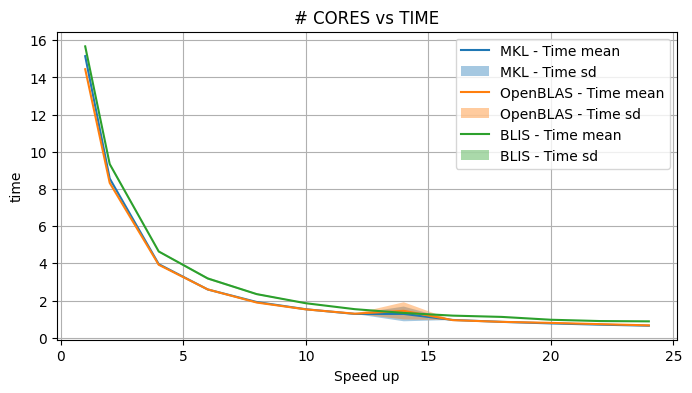

In [56]:
# Example usage:
# Call the function with your CSV file names
generate_plots_fixed_size( 
    csv_name1=  "sgemm_mkl.x_THIN_10000_close_detailed.csv",
    csv_name2="sgemm_oblas.x_THIN_10000_close_detailed.csv",
    csv_name3= "sgemm_blis.x_THIN_10000_close_detailed.csv",

    dataset_folder="csv_results_scalability_THIN"
    )


In [48]:
def generate_plots_fixed_size(csv_name, dataset_folder = 'own data'):

    # Transalate a_b_c_mkl in a_b_c
    def remove_library_names(input_string):
        # Remove "mkl," "oblas," and "blis" (case-insensitive) from the input string
        modified_string = input_string.replace('.csv', '')

        return modified_string
    
    def remove_underscores(input_string):
        # Replace underscores with spaces
        modified_string = input_string.replace('_', ' ')

        return modified_string

    # Translate underscores to spaces in the CSV file name for plot titles
    plot_title = remove_underscores(remove_library_names(csv_name))

    # Get the current directory
    current_dir = os.getcwd()

    # Define the path to the CSV file
    csv_file_path = os.path.join(current_dir, dataset_folder, csv_name)

    # Check if the CSV file exists
    df = list()
    if not os.path.exists(csv_file_path):
        print(f"CSV file '{csv_file_path}' not found.")
    else:
        # Read data from the CSV file
        df.append(pd.read_csv(csv_file_path))

    # Compute the sample mean and standard deviation for time and GFLOPS
    time_mean = list()
    time_std = list()
    
    for dataframe in df:
        time_mean.append(dataframe.groupby('cores')['time'].mean())
        #time_std.append(dataframe.groupby('cores')['time'].std())


    # Create the first plot (matrix size vs. sample mean of time with shaded standard deviation)
    plt.figure(figsize=(8, 4))
    for tm in time_mean:
        plt.plot(tm.index, tm, linestyle='-', label=' - Time mean')
        plt.ylim(0, 0.1)
        #plt.fill_between(tm.index, tm - ts, tm + ts, alpha=0.4, label=' - Time sd')
    plt.xlabel('cores')
    plt.ylabel('time')
    plt.title('# CORES vs TIME')
    plt.grid(True)
    plt.legend()
    


    # Define the folder where you want to save the image
    folder_to_store_path = './'+dataset_folder+'/plots_mpi_weak'
    # Save the first plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name) + '_time.png')
    plt.savefig(filename)

    ## Create the second plot (matrix size vs. sample mean of GFLOPS with shaded standard deviation)
    #plt.figure(figsize=(8, 4))
    #for (gm, gs, ln) in zip(gflops_mean, gflops_std, library_names):
    #    plt.plot(gm.index, gm, marker='o', linestyle='-', label=ln+' - Gflops mean')
    #    plt.fill_between(gm.index, gm - gs, gm + gs, alpha=0.2, label=ln+' - Gflops sd')
    #plt.xlabel('Number of cores')
    #plt.ylabel('GFLOPS')
    #plt.title('# OF CORES vs GFLOPS - ' + plot_title)
    #plt.grid(True)
    #plt.legend()

    ## Save the first plot in the specified folder
    #filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'gflops.png')
    #plt.savefig(filename)

    # Show the plots (optional)
    plt.show()


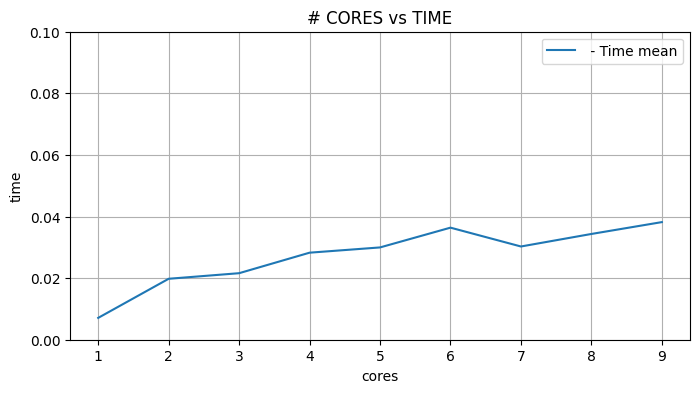

In [53]:
# Example usage:
# Call the function with your CSV file names
generate_plots_fixed_size( 
    csv_name="MPI_W-scalability_static-ev_16omp-threds-THIN.csv",

    dataset_folder="own data"
    )

In [95]:

def generate_plots_fixed_size_speed_up(csv_name1, csv_name2, csv_name3, dataset_folder, nodes_type):

    # Translate a_b_c_mkl in a_b_c
    def remove_library_names(input_string):
        # Remove "mkl," "oblas," and "blis" (case-insensitive) from the input string
        modified_string = input_string.replace('.csv', '')
        return modified_string

    def remove_underscores(input_string):
        # Replace underscores with spaces
        modified_string = input_string.replace('_', ' ')
        return modified_string

    # Translate underscores to spaces in the CSV file name for plot titles
    plot_title = remove_underscores(remove_library_names(csv_name1))

    # Get the current directory
    current_dir = os.getcwd()

    # Define the path to the CSV file
    csv_file_path1 = os.path.join(current_dir, dataset_folder, csv_name1)
    csv_file_path2 = os.path.join(current_dir, dataset_folder, csv_name2)
    csv_file_path3 = os.path.join(current_dir, dataset_folder, csv_name3)

    # Check if the CSV file exists
    df = []
    for csv_file_path in csv_file_path1, csv_file_path2, csv_file_path3 :
        if not os.path.exists(csv_file_path):
            print(f"CSV file '{csv_file_path}' not found.")
        else:
            # Read data from the CSV file
            df.append(pd.read_csv(csv_file_path))

    # Compute the sample mean for time and GFLOPS
    time_mean = []
    for dataframe in df:
        time_mean.append(dataframe.groupby('Number of cores')['Elapsed Time (s)'].mean())
    

    
    # Calculate the speedup relative to 1 OMP-thread
    speedup_1 = []
    speedup_2 = []
    speedup_3 = []
    for tm in time_mean[0]:
        speedup_1.append((time_mean[0][1]/tm))
    for tm in time_mean[1]:
        speedup_2.append((time_mean[1][1]/tm))
    for tm in time_mean[2]:
        speedup_3.append((time_mean[2][1]/tm))


    # Add the ideal speedup line
    if nodes_type == "thin":
        x_axis = list([1,2,4,6,8,10,12,14,16,18,20,22,24])
    elif nodes_type == "epyc":
        x_axis = list([1,2,4,16,32,46,64,80,96,112,128])
    y_perfect = [xi for xi in x_axis]
    


    
    # Create the plot (OMP-threads vs. Speedup)
    plt.figure(figsize=(8, 4))
    #
    plt.plot(x_axis, speedup_1, linestyle='-', label='MKL - Speedup')
    #
    plt.plot(x_axis, speedup_2, linestyle='-', label='OpenBLAS - Speedup')

    plt.plot(x_axis, speedup_3, linestyle='-', label='BLIS - Speedup')
    plt.plot(x_axis, y_perfect, linestyle='-', label='Ideal Speedup')

  
    plt.xlabel('Cores')
    plt.ylabel('Speedup')
    plt.title('# CORES vs SPEEDUP')
    plt.grid(True)
    plt.legend()

    # Create separate figures for each plot
    #plt.figure(figsize=(8, 4))
    #plt.plot(x_axis, speedup_1, linestyle='-', label='10000 - Speedup')
    #plt.plot(x_axis, y_perfect, linestyle='-', label='Ideal Speedup')
    #plt.xlabel('cores')
    #plt.ylabel('Speedup')
    #plt.title('10000 - # CORES vs SPEEDUP')
    #plt.grid(True)
    #plt.legend()

    # Define the folder where you want to save the image
    #folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    # Save the plot in the specified folder
    #filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + '10000_speedUp.png')
    #plt.savefig(filename)

    # Create a new figure for the second plot
    #plt.figure(figsize=(8, 4))
    #plt.plot(x_axis, speedup_2, linestyle='-', label='12500 - Speedup')
    #plt.plot(x_axis, y_perfect, linestyle='-', label='Ideal Speedup')
    #plt.xlabel('cores')
    #plt.ylabel('Speedup')
    #plt.title('12500 - # CCORES vs SPEEDUP')
    #plt.grid(True)
    #plt.legend()

    # Define the folder where you want to save the image
    #folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    # Save the plot in the specified folder
    #filename = os.path.join(folder_to_store_path, remove_library_names(csv_name2) + '12500_speedUp.png')
    #plt.savefig(filename)

    # Create a new figure for the third plot
    #plt.figure(figsize=(8, 4))
    #plt.plot(x_axis, speedup_3, linestyle='-', label='17500 - Speedup')
    #plt.plot(x_axis, y_perfect, linestyle='-', label='Ideal Speedup')
    #plt.xlabel('cores')
    #plt.ylabel('Speedup')
    #plt.title('17500 - # CORES vs SPEEDUP')
    #plt.grid(True)
    #plt.legend()

    # Define the folder where you want to save the image
    #folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    # Save the plot in the specified folder
    #filename = os.path.join(folder_to_store_path, remove_library_names(csv_name3) + '17500_speedUp.png')
    #plt.savefig(filename)

    # Define the folder where you want to save the image
    folder_to_store_path = './' + dataset_folder + '/plots'
    # Save the plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + '__speedUp.png')
    plt.savefig(filename)

    # Show the plot (optional)
    plt.show()




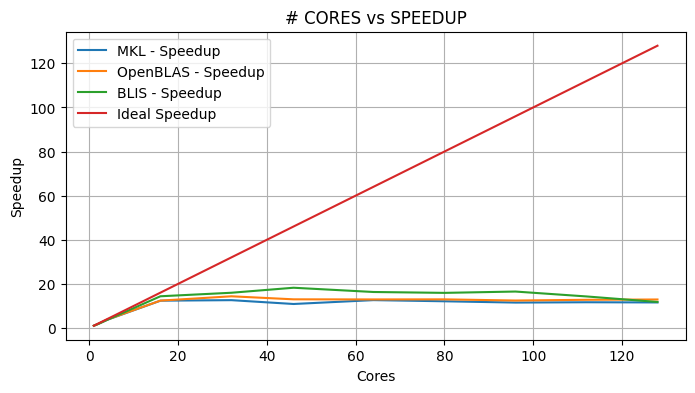

In [99]:
# Example usage:
# Call the function with your CSV file names
generate_plots_fixed_size_speed_up( 
    
    csv_name1=  "dgemm_mkl.x_EPYC_10000_spread_detailed.csv",
    csv_name2="dgemm_oblas.x_EPYC_10000_spread_detailed.csv",
    csv_name3= "dgemm_blis.x_EPYC_10000_spread_detailed.csv",

    dataset_folder="csv_results_scalability_EPYC",
    nodes_type="epyc"
    )

In [28]:
def generate_plots_fixed_size_efficiency(csv_name1, csv_name2, csv_name3 ,dataset_folder='DATA', nodes_type = "thin"):

    # Translate a_b_c_mkl in a_b_c
    def remove_library_names(input_string):
        # Remove "mkl," "oblas," and "blis" (case-insensitive) from the input string
        modified_string = input_string.replace('.csv', '')
        return modified_string

    def remove_underscores(input_string):
        # Replace underscores with spaces
        modified_string = input_string.replace('_', ' ')
        return modified_string

    # Translate underscores to spaces in the CSV file name for plot titles
    plot_title = remove_underscores(remove_library_names(csv_name1))

    # Get the current directory
    current_dir = os.getcwd()

    # Define the path to the CSV file
    csv_file_path1 = os.path.join(current_dir, dataset_folder, csv_name1)
    csv_file_path2 = os.path.join(current_dir, dataset_folder, csv_name2)
    csv_file_path3 = os.path.join(current_dir, dataset_folder, csv_name3)

    # Check if the CSV file exists
    df = []
    for csv_file_path in csv_file_path1, csv_file_path2, csv_file_path3:
        if not os.path.exists(csv_file_path):
            print(f"CSV file '{csv_file_path}' not found.")
        else:
            # Read data from the CSV file
            df.append(pd.read_csv(csv_file_path))

    # Compute the sample mean for time and GFLOPS
    time_mean = []
    for dataframe in df:
        time_mean.append(dataframe.groupby('cores')['time'].mean())
    


    # Calculate the speedup relative to 1 OMP-thread
    speedup_1 = []
    speedup_2 = []
    speedup_3 = []
    for tm in time_mean[0]:
        speedup_1.append((time_mean[0][1]/tm))
    for tm in time_mean[1]:
        speedup_2.append((time_mean[1][1]/tm))
    for tm in time_mean[2]:
        speedup_3.append((time_mean[2][1]/tm))

    efficiency_1 = []
    efficiency_2 = []
    efficiency_3 = []
    for i in range(len(speedup_1)):
        efficiency_1.append((speedup_1[i])/(i+1))
    for i in range(len(speedup_2)):
        efficiency_2.append((speedup_2[i])/(i+1))
    for i in range(len(speedup_3)):
        efficiency_3.append((speedup_3[i])/(i+1))


    # Add the ideal speedup line
    if nodes_type == "thin":
        x_axis = [i+1 for i in range(48)]
        y_axis = [1 for _ in range(48)]
    elif nodes_type == "epyc":
        x_axis = [i+1 for i in range(64)]
        y_axis = [1 for _ in range(64)]
    

    
    # Create the plot (OMP-threads vs. Speedup)
    #plt.figure(figsize=(8, 4))
    #plt.plot(x_axis, efficiency_1, linestyle='-', label='10000 - Efficiency')
    #plt.plot(x_axis, efficiency_2, linestyle='-', label='12500 - Efficiency')
    #plt.plot(x_axis, efficiency_3, linestyle='-', label='17500 - Efficiency')
    #plt.plot(x_axis, y_axis, linestyle='-', label='Ideal Efficiency')
#
    #plt.xlabel('cores')
    #plt.ylabel('Efficiency')
    #plt.title('# CORES vs EFFICIENCY')
    #plt.grid(True)
    #plt.legend()
#
    ## Define the folder where you want to save the image
    #folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    ## Save the plot in the specified folder
    #filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + 'efficiency.png')
    #plt.savefig(filename)

    plt.figure(figsize=(8, 4))
    plt.plot(x_axis, efficiency_1, linestyle='-', label='10000 - Efficiency')
    plt.plot(x_axis, y_axis, linestyle='-', label='Ideal Efficiency')
    plt.xlabel('cores')
    plt.ylabel('Efficiency')
    plt.title('# CORES vs EFFICIENCY')
    plt.grid(True)
    plt.legend()

    # Define the folder where you want to save the image
    folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    # Save the plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name1) + '10000_efficiency.png')
    plt.savefig(filename)


    plt.figure(figsize=(8, 4))
    plt.plot(x_axis, efficiency_2, linestyle='-', label='12500 - Efficiency')
    plt.plot(x_axis, y_axis, linestyle='-', label='Ideal Efficiency')
    plt.xlabel('cores')
    plt.ylabel('Efficiency')
    plt.title('# CORES vs EFFICIENCY')
    plt.grid(True)
    plt.legend()

    # Define the folder where you want to save the image
    folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    # Save the plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name2) + '12500_efficiency.png')
    plt.savefig(filename)


    plt.figure(figsize=(8, 4))
    plt.plot(x_axis, efficiency_3, linestyle='-', label='17500 - Efficiency')
    plt.plot(x_axis, y_axis, linestyle='-', label='Ideal Efficiency')
    plt.xlabel('cores')
    plt.ylabel('Efficiency')
    plt.title('# CORES vs EFFICIENCY')
    plt.grid(True)
    plt.legend()

    # Define the folder where you want to save the image
    folder_to_store_path = './' + dataset_folder + '/plots_mpi_strong'
    # Save the plot in the specified folder
    filename = os.path.join(folder_to_store_path, remove_library_names(csv_name3) + '17500_efficiency.png')
    plt.savefig(filename)

    # Show the plot (optional)
    plt.show()




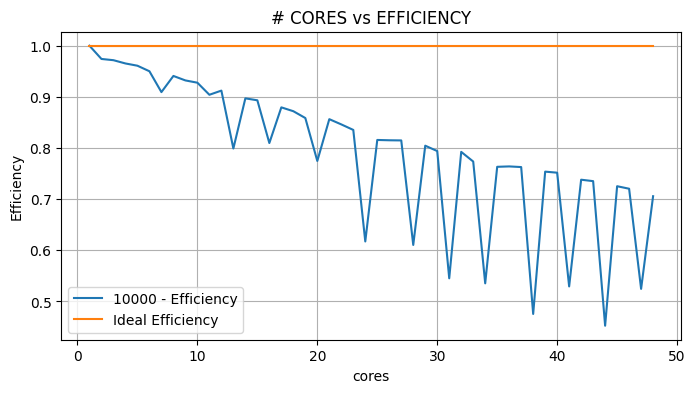

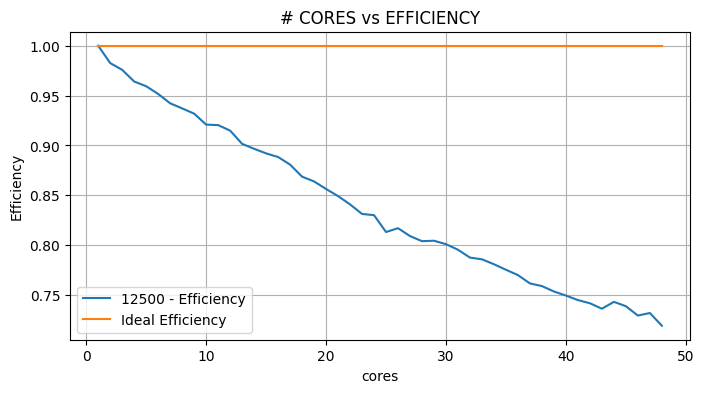

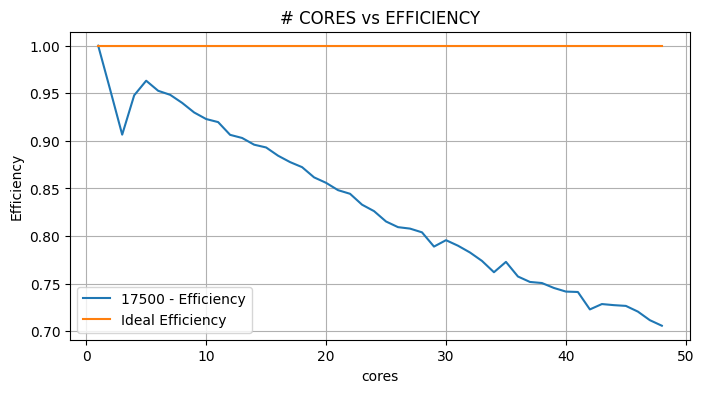

In [29]:
# Example usage:
# Call the function with your CSV file names
generate_plots_fixed_size_efficiency( 
    csv_name1="MPI_strong-static-10000-10-THIN.csv",
    csv_name2="MPI_strong-static-12500-10-THIN.csv",
    csv_name3="MPI_strong-static-17500-10-THIN.csv",

    dataset_folder="own data",
    nodes_type="thin"
    )